In [2]:
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt



In [3]:

#Read Water Quality Data
water_quality_fp="../data/epd_water_quality/prc/epd_water_quality_1986_2022.csv"
water_quality_df=pd.read_csv(water_quality_fp).dropna()
summer_mean=pd.read_csv("../data/epd_water_quality/prc/summer_mean_1986_2022.csv")
summer=pd.read_csv("../data/epd_water_quality/prc/summer_1986_2022.csv")
winter = pd.read_csv("../data/epd_water_quality/prc/winter_1986_2022.csv")
vars=['chla_surf', 'diss_o_surf', 'ph_surf',
       'salinity_surf', 'turbidity_surf', 'temp_surf', 'suspended_solids_surf',
       'nitrates_surf','chla_bott', 'diss_o_bott', 'ph_bott',
       'salinity_bott', 'turbidity_bott', 'temp_bott', 'suspended_solids_bott',
       'nitrates_bott']

# Read EPD Stations Metadata
epd_stations_fp="../data/epd_water_quality/prc/epd_stations.csv"
epd_stations=pd.read_csv(epd_stations_fp)

# Box Plot

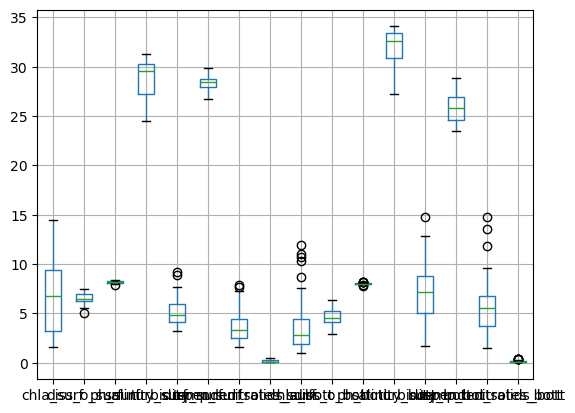

In [4]:
summer_mean[vars].boxplot()
plt.show()

## Correlation Matrix

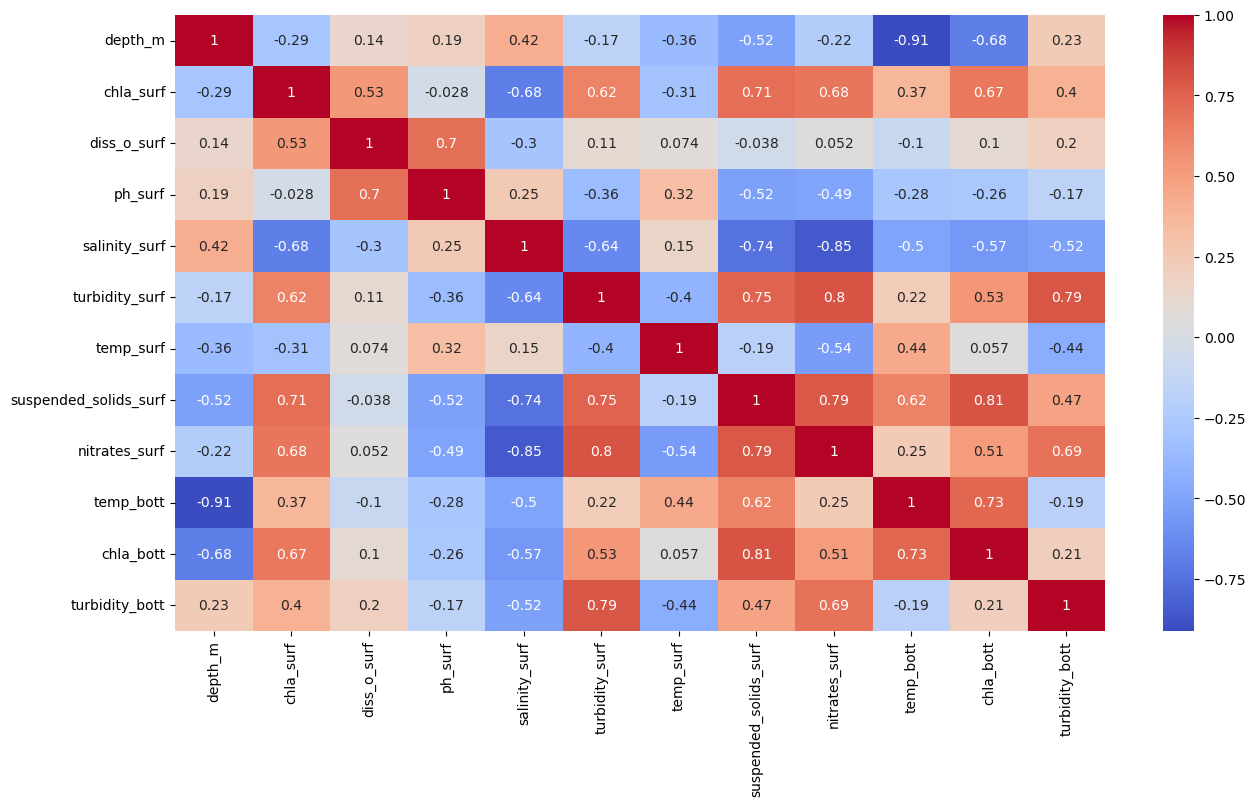

In [9]:
import seaborn as sns
 
# checking correlation using heatmap
#Loading dataset

plt.figure(figsize=(15,8))
#plotting the heatmap for correlation between surface variables and bottom temperature

ax = sns.heatmap(summer_mean[["depth_m",'chla_surf', 'diss_o_surf', 'ph_surf',
       'salinity_surf', 'turbidity_surf', 'temp_surf', 'suspended_solids_surf',
       'nitrates_surf', 'temp_bott']].corr(), annot=True, cmap=sns.color_palette("coolwarm", as_cmap=True))
plt.show()

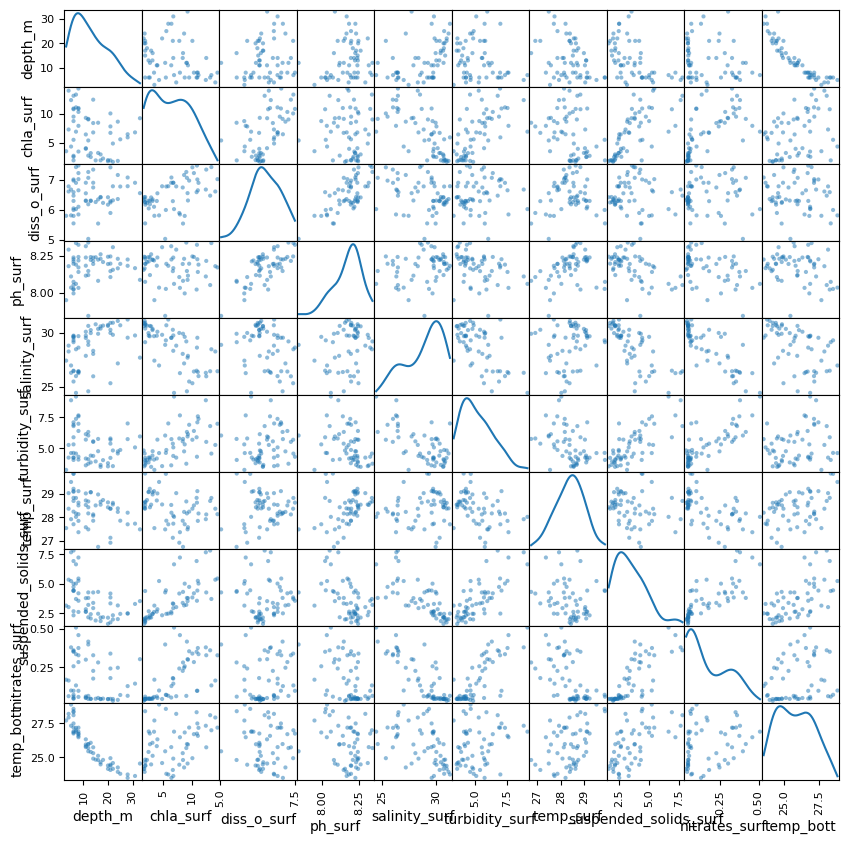

In [6]:
from pandas.plotting import scatter_matrix

scatter_matrix(summer_mean[["depth_m",'chla_surf', 'diss_o_surf', 'ph_surf',
       'salinity_surf', 'turbidity_surf', 'temp_surf', 'suspended_solids_surf',
       'nitrates_surf', 'temp_bott',]], figsize=(10,10),diagonal='kde')
plt.show()

## Plot Mean Surface / Bottom Temperatre across Depth for Summer vs Winter

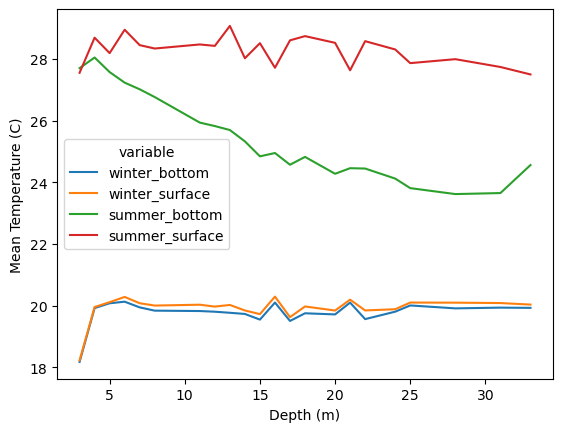

In [7]:

data_preproc = pd.DataFrame(dict(
    depth = summer.groupby("depth_m").temp_bott.mean().reset_index().depth_m.to_list(),
    winter_bottom=winter.groupby("depth_m").temp_bott.mean().to_list(),
    winter_surface=winter.groupby("depth_m").temp_surf.mean().to_list(),
    summer_bottom=summer.groupby("depth_m").temp_bott.mean().to_list(),
    summer_surface=summer.groupby("depth_m").temp_surf.mean().to_list(),
)
    )

# Convert the dataframe from wide to long format 
dfl = pd.melt(data_preproc, ['depth'])
ax1=sns.lineplot(data=dfl, x='depth', y='value', hue='variable')
ax1.set(xlabel='Depth (m)', ylabel='Mean Temperature (C)')
plt.show(ax1)


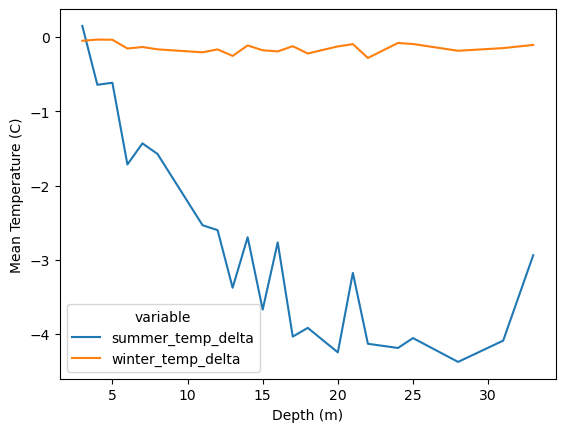

In [8]:


data_preproc = pd.DataFrame(dict(
    depth = summer.groupby("depth_m").temp_bott.mean().reset_index().depth_m.to_list(),
    summer_temp_delta=summer.groupby("depth_m").temp_delta.mean().to_list(),
    winter_temp_delta=winter.groupby("depth_m").temp_delta.mean().to_list()
)
    )

# Convert the dataframe from wide to long format 
dfl = pd.melt(data_preproc, ['depth'])
ax2=sns.lineplot(data=dfl, x='depth', y='value', hue='variable')
ax2.set(xlabel='Depth (m)', ylabel='Mean Temperature (C)')
plt.show(ax2)
